# Interpolação polinomial

## $ \S 1 $ Introdução

É freqüente a situação em que temos uma tabela com alguns valores de uma função
desconhecida e precisamos "ler entre as linhas" da tabela para encontrar valores
de que não foram dados.

__Definição (interpolação):__ __Interpolar__ significa estimar valores
desconhecidos ou de difícil determinação através de uma função que satisfaça
um conjunto conhecido de dados.

📝 Uma minoria de autores prefere distingüir entre _interpolação_ ou
_extrapolação_ conforme pretenda-se encontrar um valor desconhecido dentro ou
fora do intervalo coberto pelos dados originais, respectivamente.

A __interpolação polinomial__ consiste do uso de um polinômio que satisfaça os
dados iniciais para obter novos dados. Para construir este polinômio, os dados
iniciais mais freqüentes são:
* Valores de uma função em vários pontos (_interpolação de Lagrange,
  interpolação por diferenças divididas de Newton_);
* Valores das sucessivas derivadas de uma função num único ponto (_polinômio de Taylor_);
* Valores da função e de suas derivadas em vários pontos (_interpolação de Hermite_).

Observe que polinômios são especialmente convenientes como funções aproximadoras por serem facilmente avaliados, diferenciados e integrados.

![Diferença entre ajuste e interpolação](fig_4-1_ajuste_vs_interpolacao.png
"Diferença entre ajuste e interpolação")

__Exemplo 1 (calibração de sensores:)__ Considere um sensor (como um termopar ou
um sensor de pressão) que converte uma medição física em um sinal elétrico.
Durante a calibração do sensor, medimos a saída do sensor (tensão)
para diferentes valores conhecidos da variável física (temperatura, pressão,
etc.). Contudo, a relação entre estas duas quantidades pode ser não-linear e
desconhecida. Neste caso, podemos interpolar um polinômio por alguns pontos de
calibração. Daí em diante este polinômio pode ser utilizado para converter as
leituras do sensor nos valores aproximados das quantidades físicas
correspondentes.

__Exemplo 2 (interpolação de cores em imagens digitais):__ Em computação
gráfica, uma imagem digital é formada por _pixels_, cada um com um valor de cor.
Ao se aplicar uma transformação a uma imagem (e.g., rotação ou
redimensionamento), uma abordagem comum em software de processamento de imagens
é usar a chamada _interpolação bicúbica_, que é uma forma de interpolação
polinomial de ordem 3, para estimar os valores de cor dos novos pixels com base
naqueles de pixels vizinhos.  

__Exemplo 3 (estimativas de propriedades termodinâmicas):__ Considere uma
turbina a vapor operando a uma pressão de constante.  Para determinar as
propriedades do vapor (por exemplo, entalpia, capacidade térmica específica ou
entropia) nas condições de operação da turbina, podemos utilizar interpolação
polinomial para estimar valores desconhecidos a partir de alguns outros
previamente medidos e tabelados. 

## $ \S 2 $ Existência e unicidade do polinômio interpolador

Resumidamente, o resultado central diz que podemos interpolar $ N + 1 $ pontos por
um único polinômio de grau $ \le N $.

__Teorema 2.1 (existência e unicidade do polinômio interpolador):__ _Dados $ N + 1 $ pontos
\begin{equation*}
(x_1, y_1)\,,\ (x_2, y_2)\,,\ \dots\,,\ (x_{N + 1}, y_{N + 1})\,,
\end{equation*}
com $ x_i \ne x_{j} $ para $ i \ne j $, existe um único polinômio de grau $ \le N $ que os interpola._

Na situação do teorema, se $ y_i = f(x_i) $ para uma função $ f $, dizemos
também que $ p $ **interpola $ f $ nos pontos $ x_i $**.

⚠️ O teorema *não* afirma que existe apenas um polinômio que se ajuste aos
dados; ele garante apenas que existe um único polinômio *de grau $ \le N $*. De
fato, sem esta restrição sobre o grau, podemos obter infinitas soluções,
bastando para isto somar ao polinômio mencionado no enunciado um polinômio
qualquer que se anule em $ x_1,\,x_2,\, \dots,\,x_{N + 1} $. Note que como os
$ x_i $ são mutuamente distintos por hipótese, qualquer polinômio que se anule em
todos eles deve ter grau pelo menos $ N + 1 $.

Antes de demonstrarmos o Teorema, consideremos dois exemplos simples. Mais tarde estudaremos
métodos mais eficientes para efetivamente _encontrar_ o polinômio interpolador ao qual
o Teorema se refere.

__Exemplo 4:__ Determine o polinômio interpolador de grau $ \le 1 $ que passa pelos
pontos $ (1, 3) $ e $ (2, 5) $.

_Solução:_ Seja $ p(x) = a_0 + a_1 x $ este polinômio. Substituindo os valores
dados, deduzimos que os coeficientes devem satisfazer o seguinte sistema de
equações lineares:
$$
\begin{cases}
  a_0 + a_1 &= 3 \\
  a_0 + 2a_1 &= 5
\end{cases}
$$
Resolvendo o sistema, encontramos que $ a_0 = 1 $ e $ a_1 = 2 $. Portanto o
polinômio procurado é $ p(x) = 1 + 2x $.

![Exemplo 4](fig_4-1_exemplo_4.png "Exemplo 4")

📝 Como ilustrado pelo exemplo seguinte, para aplicação do teorema, não há
problema que $ y_i = y_{j} $ para algum par $ i \ne j $. Por outro lado, uma
função não pode assumir dois valores diferentes num mesmo elemento do seu
domínio. Portanto, se $ x_i = x_{j} $ para alguns $ i \ne j $, então não existe
um polinômio que se ajuste aos dados, a não ser que também ocorra
$ y_i = y_{j} $, caso em que a lista dos dados iniciais conteria repetições.

__Exemplo 5:__ Determine o único polinômio de grau $ \le 2 $ que passa pelos
pontos $ (0, 1) $, $ (1, 1) $ e $ (2, 3) $.

_Solução:_
Seja $ q(x) = b_0 + b_1 x + b_2 x^2 $ este polinômio. Substituindo os pontos
dados, obtemos o seguinte sistema de equações lineares:
$$
\begin{cases}
  b_0 &= 1 \\
  b_0 + b_1 + b_2 &= 1 \\
  b_0 + 2 b_1 + 4 b_2  &= 3
\end{cases}
$$
Resolvendo o sistema usando eliminação Gaussiana, encontramos
$ b_0 = 1 $, $ b_1 = -1 $ e $ b_2 = 1 $.  Portanto
$$
q(x) = 1 - x + x^2\,.
$$

![Exemplo 5](fig_4-1_exemplo_5.png "Exemplo 5")


__Demonstração da unicidade (Teorema 2.1):__ Suponha que $ p $ e $ q $ sejam polinômios de grau $ \le N $ cujos gráficos contêm os pontos dados. Então $ p - q $ é um polinômio de grau $ \le N $ que possui ao menos $ N + 1 $ raízes: $ x_1, x_2, \dots, x_{N + 1} $. O único polinômio com estas propriedades é o polinômio identicamente nulo, donde concluímos que $ p = q $.

__Demonstração da existência (Teorema 2.1):__ Seja
$$
p(x) = a_0 + a_1 x + a_2x^2 + \cdots + a_nx^N = \sum_{k=1}^N a_kx^k
$$
o polinômio procurado. Temos:
* $ N + 1 $ coeficientes indeterminados $ a_0, a_1, \dots, a_N $;
* $ N + 1 $ condições a serem satisfeitas, a saber: $ p(x_i) = y_i $ para $ i=1, \dots, N + 1 $.

Isto dá origem ao sistema de $ N + 1 $ equações
$$
\begin{cases}
a_0 &+& a_1x_1 &+& a_2x_1^2 &+& \cdots &+& a_Nx_1^N &= y_1\\
a_0 &+& a_1x_2 &+& a_2x_2^2 &+& \cdots &+& a_Nx_2^N &= y_2\\
\ \vdots &&\ \ \vdots &&\ \ \vdots && \cdots &&\ \ \vdots &\quad \vdots \\
a_0 &+& a_1x_{N+1} &+& a_2x_{N+1}^2 &+& \cdots &+& a_Nx_{N+1}^N &= y_{N+1}
\end{cases}
$$
ou, em forma matricial,
\begin{equation*}
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_N
\end{bmatrix}=
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_N
\end{bmatrix}
\end{equation*}
Observe que este é um sistema _linear_. As indeterminadas são os $ a_k $, e não
as potências dos $ x_k $, que são conhecidas ou podem ser calculadas facilmente.

Há pelo menos dois caminhos para se mostrar que este sistema tem uma solução. O
primeiro é exibi-la diretamente, o que faremos no próximo caderno. O segundo
consiste em mostrar que a matriz $ (N + 1) \times (N + 1) $ à esquerda é
invertível; isto também dá uma nova demonstração da unicidade.

O determinante desta matriz é conhecido como um __determinante de Vandermonde__:
$$
V = 
\begin{vmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{vmatrix} = \lvert x_i^j \rvert \qquad (i=1,\dots,N+1,\ j = 0,\dots,N).
$$
Mostraremos na $ \S 5 $ que ele é não-nulo desde que $ x_i \ne x_{i'} $ para quaisquer $ i \ne i' $. Portanto o sistema linear tem uma única solução $ (a_0,a_1,\dots,a_N) $. Estes são os coeficientes do polinômio $ p $ procurado.
<div style="text-align: right">$ \blacksquare $ </div>

📝 O grau do polinômio interpolador será "quase sempre" exatamente igual a $ N $. Contudo, em casos excepcionais ele poderá ser menor. Por exemplo:
* Para $ N = 1 $, o polinômio interpolador terá grau $ < 1 $ se e somente se $ y_0 = y_1 $;
* Para $ N = 2 $, o polinômio interpolador terá grau $ < 2 $ se e somente se os três pontos $ (x_1, y_1) $, $ (x_2, y_2) $ e $ (x_3, y_3) $ forem colineares.

📝 A maioria dos métodos numéricos de integração é baseada na interpolação polinomial. A idéia é simples: Dada uma função $ f \colon [a, b] \to \mathbb R $ cuja integral se queira calcular, subdividimos $ [a, b] $ em alguns subintervalos e, em cada um deles,  aproximamos $ f $ por um polinômio interpolador de grau fixo (que varia conforme o método). Finalmente, tomamos a soma das integrais destes polinômios, que são facilmente calculadas.

## $ \S 3 $ Problemas

__Problema 1:__

(a) Sem usar o computador, encontre o polinômio $ p $ de menor grau possível que se ajuste aos dados:

|$x$|$y$|
|---|---|
|$0$|$2$|
|$1$|$2$|
|$2$|$0$|
|$3$|$0$|

(b) Exiba um outro polinômio $ q $ que se ajusta a estes dados. É possível tomar $ q $ de mesmo grau que o de $ p $?

(c) Esboce o gráfico deste polinômio usando Python.

(d) Encontre $ p(4) $.

_Solução:_

__Problema 2:__ Usando Python:

(a) Encontre o polinômio interpolador (de menor grau) para $ y = \log_{10} x $ e $ x = 1, 2, 3, 4 $.

(b) Esboce o gráfico deste polinômio juntamente com o gráfico de  $ \log_{10} x $.

_Solução:_

[[ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]
[0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624]
[-0.49975495  0.62371283 -0.13625558  0.0122977 ]


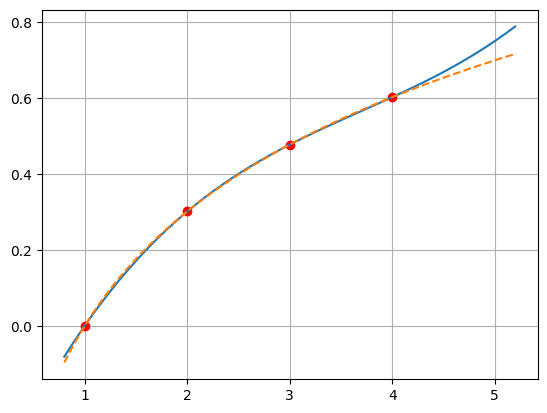

In [1]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
xs = [1, 2, 3, 4]
ys = [np.log10(x) for x in xs]
A = np.array([xs[i]**j for i in range(N + 1) for j in range(N + 1)])
A = A.reshape(N + 1, N + 1)

print(A)
print(ys)
cs = np.linalg.solve(A, ys)
print(cs)

def p(x):
    return sum(cs[i] * x**i for i in range(N + 1))

x_grid = np.linspace(0.8, 5.2, num=50)
plt.plot(xs, ys, 'ro')
plt.plot(x_grid, p(x_grid), '-')
plt.plot(x_grid, np.log10(x_grid), '--')
plt.grid()
plt.show()



**Problema 3:** Usando interpolação polinomial *linear*, aproxime $ \cos(73.5^{\circ}) $ usando os valores tabelados seguintes:

(a) $ \cos(70^\circ) = 0.34202 $ e $ \cos(80^\circ) = 0.17365 $;

(b) $ \cos(73^\circ) = 0.29237 $ e  $ \cos(74^\circ) = 0.27564 $.

Os resultados obtidos servem para ilustrar que em geral a interpolação linear é adequada apenas sobre intervalos pequenos.

_Solução:_

__Problema 4:__ É dada a tabela seguinte contendo alguns valores de uma função
desconhecida $ f $:

|$x$ |$f(x)$|
|:----:| :----: |
|$-1$| $-1$ |
|$2$ | $-4$ |
|$4$ | $4$  |

(a) Encontre o polinômio de menor grau possível que se ajusta a estes dados.

(b) Utilize-o para aproximar o zero de $ f $ no intervalo $ [-1, 4] $.

(c) Utilize-o para estimar $ \int_{-1}^4 f(x)\,dx $.

_Solução:_

## $ \S 4 $ O determinante de Vandermonde

__Teorema 4.1 (fórmula para o determinante de Vandermonde):__ _Seja $ V $ o
determinante de Vandermonde em $ N + 1 $ elementos $ x_i $:_
$$
V = \begin{vmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^N \\
1 & x_2 & x_2^2 & \cdots & x_2^N \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_{N+1} & x_{N+1}^2 & \cdots & x_{N+1}^N 
\end{vmatrix} = \lvert x_i^j \rvert \qquad (i=1,\dots,N+1,\ j = 0,\dots,N)
$$
_Então_
$$
\boxed{V = \prod_{i>j=1}^{N+1}(x_i-x_j)}
$$
_Em particular, $ V \ne 0 $ se e somente se $ x_i \ne x_j $ para todos $ i \ne j $._

__Problema 5:__

(a) Calcule o determinante de Vandermonde $ V $ associado a
$ x_1 = 1 $, $ x_2 = 2 $ e $ x_3 = 3 $.

(b) Verifique a validade da fórmula para $ V $ neste caso.

(c) Agora suponha que $ x_1 = 1 $, $ x_2 = 2 $ mas $ x_3 = x $ seja desconhecido.
Encontre $ V $ diretamente e mostre que
$$
V = (x - 1)(x - 2)(2 - 1)\,.
$$

_Solução:_

__Demonstração do Teorema 4.1:__ Considere $ V = V(x_1,x_2,\dots,x_{N+1}) $ como uma função das variáveis $ x_i $. Claramente, $ V $ é um polinômio em $ x_1, x_2, \dots, x_{N + 1} $. Contando os expoentes, vemos que seu grau é
$$
0 + 1 + 2 + \dots + N = \frac{N(N + 1)}{2}.
$$
Além disto, se $ x_{2} = x_1 $, então a primeira e segunda linhas coincidem,
logo $ V = 0 $. Segue que $ V $ tem $ x_2 - x_1 $ como fator. Mais
geralmente, se $ x_i = x_j $ para $ i > j $, então $ V $ se anula, pois neste
caso a $ i $-ésima e $ j $-ésima linha são idênticas. Daí deduzimos que
$ x_i - x_j $ é fator de $ V $ para quaisquer $ i > j $. Seja
$$
P = \prod_{i>j=1}^{N + 1} (x_i-x_j).
$$
Então $ P $ também é um polinômio, de grau 
$$
N + (N - 1) + \dots + 2 + 1 = \frac{N(N+1)}{2}.
$$
Como $ P $ divide $ V $, mas ao mesmo tempo eles têm o mesmo grau, deduzimos que eles diferem apenas por uma constante multiplicativa. Para encontrá-la, basta comparar o mesmo termo em ambas representações. O termo diagonal do determinante é
$$ 1 \cdot x_2 \cdot x_3^2 \cdots x_{N+1}^N .$$
O produto de todos os termos à esquerda na expressão para $ P $ é
$$ x_{N+1}^N \cdot x_N^{N-1} \cdots x_2. $$
Como eles coincidem, concluímos que $ V = P $:
$$
V(x_1,x_2,\dots,x_{N+1}) = \left\vert x_i^j \right\vert = \prod_{i>j=1}^{N + 1} (x_i-x_j) \tag*{$ \blacksquare $}
$$

## $ \S 5 $ Problemas adicionais

__Problema 6:__ Dados os valores tabelados abaixo:

|$x$|$y$|
|:---:|:---:|
|$0$|$2$|
|$1$|$5$|
|$2$|$10$|

(a) Encontre o único polinômio $ p $ de grau $ \le 2 $ que os interpola.

(b) Verifique sua resposta usando Python para plotar o gráfico de $ p $ juntamente
com os pontos $ (x, y) $, aproveitando o código abaixo.

_Solução:_

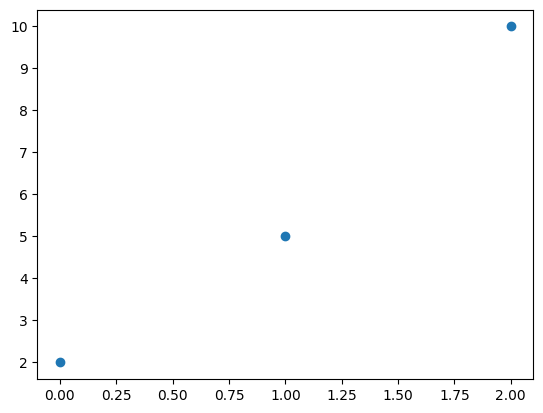

In [23]:
import matplotlib.pyplot as plt
import numpy as np


xs_pontos = np.array([0, 1, 2])
ys_pontos = np.array([2, 5, 10])
plt.plot(xs_pontos, ys_pontos, 'o')
plt.show()


__Problema 7:__

(a) Interpole a função cosseno nos pontos $ (0, 1) $, $ (\pi / 2, 1) $ e $ (\pi, -1) $
por um polinômio quadrático $ q(x) $.

(b) Usando Python, esboce os gráficos de $ \cos $ e de $ q $.

_Solução:_

__Problema 8:__ Encontre o único polinômio de grau $ \le 2 $ passando pelos
pontos $ (-1, a) $, $ (0, b) $ e $ (1, c) $, onde $ a,\,b,\,c \in \R $ são
constantes arbitrárias.


_Solução:_